# <div style="background-color: #153B50; font-family: Trebuchet MS; color: #FFFFFF; padding: 5px; font-size: 150%; text-align: center; line-height: 1; border-radius: 10px 10px;">AI ChatBot</div>

Intelligent ChatBot built with Microsoft's DialoGPT transformer to interact with human users!

# <div style="font-family: Trebuchet MS; background-color: #153B50; color: #FFFFFF; padding: 12px; line-height: 1.5;">What's a ChatBot?</div>

ChatBot adalah jenis asisten virtual yang dapat membangun percakapan dengan pengguna manusia! Robot Chatting. Membangun sebuah chatbot adalah salah satu tugas yang populer dalam Pengolahan Bahasa Alami (NLP).
ChatBot is a kind of virtual assistant that can build conversations with human users! Robot Chatting. Building a chatbot is one of the popular tasks in Natural Language Processing (NLP).

## <div style="font-family: Trebuchet MS; background-color: #153B50; color: #FFFFFF; padding: 12px; line-height: 1.5;">Are all chatbots the same?</div>

Chatbots are classified into three categories:
1. Rule-based chatbots
2. Retrieval-based chatbots
3. Intelligent chatbots

### <div style="font-family: Trebuchet MS; background-color: #153B50; color: #FFFFFF; padding: 12px; line-height: 1.5;">Rule-based chatbots</div>

Rule-based chatbots are a type of chatbot that operates based on a predetermined set of rules or logic. They use these rules to process user input and provide responses according to predetermined patterns. Rule-based chatbots do not have the ability to deeply understand context or complex language, as they only respond based on pre-programmed rules.

### <div style="font-family: Trebuchet MS; background-color: #153B50; color: #FFFFFF; padding: 12px; line-height: 1.5;">Retrieval-based chatbots</div>

A retrieval-based chatbot selects responses from a pre-programmed list of answers based on similarities between user requests and available data. They employ pattern matching algorithms or choose the best answers based on keywords or other characteristics in user input. These chatbots do not generate new replies; rather, they select the best response from a predefined list of answers.

### <div style="font-family: Trebuchet MS; background-color: #153B50; color: #FFFFFF; padding: 12px; line-height: 1.5;">Intelligent chatbots</div>

Intelligent chatbots are a type of chatbot that uses sophisticated artificial intelligence technologies and algorithms, such as natural language processing (NLP), machine learning, and contextual understanding to understand and respond to user input in a more complex and adaptive way. Smart Chatbots can learn from user interaction and improve performance over time. They can understand more natural languages, deal with complex questions, and provide more contextual and relevant responses.

## <div style="font-family: Trebuchet MS; background-color: #153B50; color: #FFFFFF; padding: 12px; line-height: 1.5;">In this notebook?</div>

We will describe how we created an intelligent AI chatbot based on Microsoft's well-known transformer architecture, DialoGPT. DialoGPT, built on the Hugging Face card concept, is a cutting-edge generation response model for multi-turn talks. Human evaluation results revealed that the response created by DialogPT is comparable to the quality of human responses in the Turing single-turn conversation test. The model was trained using 147 million multi-turn interactions from Reddit's discussion thread.

# <div style="font-family: Trebuchet MS; background-color: #153B50; color: #FFFFFF; padding: 12px; line-height: 1.5;">Let's Start</div>

Import the required libraries and frameworks!

In [1]:
import numpy as np
import time
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from transformers.utils import logging
logging.get_logger("transformers").setLevel(logging.ERROR)

### Download the DialoGPT model and tokenizer from Microsoft
The Hugging Face checkpoint for the model and tokenizer is "microsoft/DialoGPT-medium"

In [2]:
# checkpoint 
checkpoint = "microsoft/DialoGPT-medium"
# download and cache tokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint, padding_size="left")
# download and cache pre-trained model
model = AutoModelForCausalLM.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

### Class ChatBot

In [3]:
# build a ChatBot class with all the modules needed to conduct a complete conversation
class ChatBot():
    # initialization
    def __init__(self):
        # once a conversation is started, history will be saved for smooth conversation
        self.chat_history_ids = None
        # makes input ids global for use anywhere in the object
        self.bot_input_ids = None
        # a sign to check whether to end the conversation
        self.end_chat = False
        # greeting text when starting a conversation
        self.welcome()
        
    def welcome(self):
        print("Initializing ChatBot ...")
        # time to set up the user
        time.sleep(2)
        print('Type "bye" or "quit" or "exit" to end chat \n')
        # allow time to read what has been printed
        time.sleep(3)
        # greetings and introductions
        greeting = np.random.choice([
            "Welcome, I am ChatBot, here for your kind service",
            "Hey, Great day! I am your virtual assistant",
            "Hello, it's my pleasure meeting you",
            "Hi, I am a ChatBot. Let's chat!"
        ])
        print("ChatBot >>  " + greeting)
        
    def user_input(self):
        # receive input from the user
        text = input("User    >> ")
        # end the conversation if the user wishes
        if text.lower().strip() in ['bye', 'quit', 'exit']:
            # turn on the sign
            self.end_chat=True
            # closing remarks
            print('ChatBot >>  See you soon! Bye!')
            time.sleep(1)
            print('\nQuitting ChatBot ...')
        else:
            # continuing the conversation, processing the input text
            # encode new user input, add eos_token, and return tensor in Pytorch
            self.new_user_input_ids = tokenizer.encode(text + tokenizer.eos_token, \
                                                       return_tensors='pt')

    def bot_response(self):
        # add new user input token to conversation history
        # jika percakapan sudah dimulai sebelumnya
        if self.chat_history_ids is not None:
            self.bot_input_ids = torch.cat([self.chat_history_ids, self.new_user_input_ids], dim=-1) 
        else:
            # if first entry, initialize bot_input_ids
            self.bot_input_ids = self.new_user_input_ids
        
        # define new chat_history_ids based on previous conversations
        # generate responses while limiting total conversation history to 1000 tokens
        self.chat_history_ids = model.generate(self.bot_input_ids, max_length=1000, \
                                               pad_token_id=tokenizer.eos_token_id)
            
        # the last output token of the bot
        response = tokenizer.decode(self.chat_history_ids[:, self.bot_input_ids.shape[-1]:][0], \
                               skip_special_tokens=True)
        # if the bot fails to answer
        if response == "":
            response = self.random_response()
        # show bot response
        print('ChatBot >>  '+ response)
        
    # if there is no response from the model
    def random_response(self):
        i = -1
        response = tokenizer.decode(self.chat_history_ids[:, self.bot_input_ids.shape[i]:][0], \
                               skip_special_tokens=True)
        # iterate backwards over the history to find the last token
        while response == '':
            i = i-1
            response = tokenizer.decode(self.chat_history_ids[:, self.bot_input_ids.shape[i]:][0], \
                               skip_special_tokens=True)
        # If it's a question, answer it appropriately
        if response.strip() == '?':
            reply = np.random.choice(["I don't know", 
                                     "I am not sure"])
        # not a question? answer correctly
        else:
            reply = np.random.choice(["Great", 
                                      "Fine. What's up?", 
                                      "Okay"
                                     ])
        return reply

### Happy Chatting

In [4]:
# build obyek ChatBot
bot = ChatBot()
# start chatting
while True:
    # get user input
    bot.user_input()
    # if you want to end the conversation
    if bot.end_chat:
        break
    # output bot respons
    bot.bot_response()

Initializing ChatBot ...
Type "bye" or "quit" or "exit" to end chat 

ChatBot >>  Hi, I am a ChatBot. Let's chat!


User    >>  hi, how are you?


ChatBot >>  I'm good, how are you?


User    >>  great. are you computer programmer?


ChatBot >>  I am not, but I am a computer programmer.


User    >>  what langeages do you know?


ChatBot >>  I know Java, Python, and C.


User    >>  great. how many software projects have you done?


ChatBot >>  I have done a few, but I have not done any software projects.


User    >>  who created python?


ChatBot >>  I created Python.


User    >>  that's so awesome


ChatBot >>  I'm so proud of you.


User    >>  great. do you have a github account?


ChatBot >>  I have a github account.


User    >>  it is my pleasure meeting you


ChatBot >>  Fine. What's up?


User    >>  bye


ChatBot >>  See you soon! Bye!

Quitting ChatBot ...


### Sampel chat
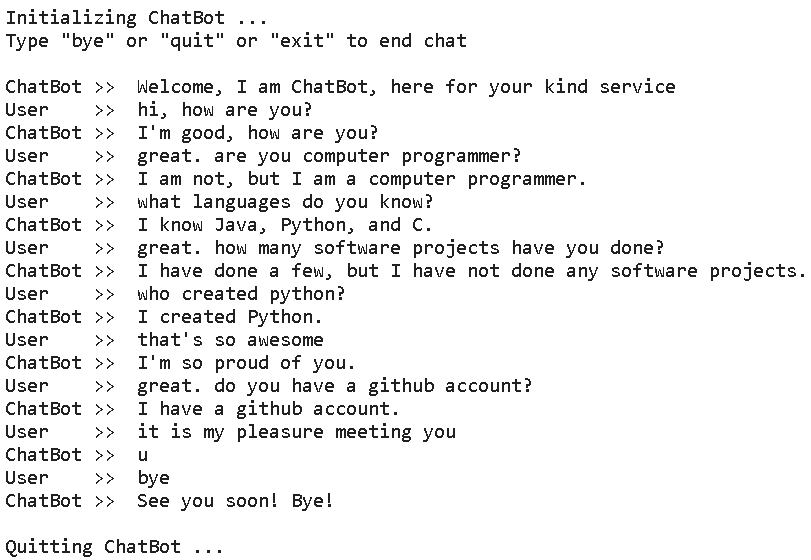

*Thank you for visit*